# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data_df=pd.merge(study_results,mouse_metadata,
                                how='inner', on='Mouse ID')

#dropping the dublicate mouse by its ID
cleaned_mouse_data_df=combined_mouse_data_df.drop_duplicates(subset=['Mouse ID'])

# Display the data table for preview
cleaned_mouse_data_df.reset_index(drop=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [84]:
# Checking the number of mice.
num_of_mince_data=len(cleaned_mouse_data_df)
num_of_mince_data

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_data_df=combined_mouse_data_df[combined_mouse_data_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicated_data_df
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=duplicated_data_df['Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [113]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id=combined_mouse_data_df.loc[combined_mouse_data_df['Mouse ID'] == 'g989']
dup_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=combined_mouse_data_df.loc[combined_mouse_data_df['Mouse ID'] !='g989']
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
# Checking the number of mice in the clean DataFrame.
num_mice=len(cleaned_df['Mouse ID'].unique())
num_mice

248

## Summary Statistics

In [8]:
combined_mouse_data_df["Tumor Volume (mm3)"].mean()

50.448380631336505

In [9]:
combined_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

group_by_summary=combined_mouse_data_df.groupby("Drug Regimen")

drug_reg_summary=pd.DataFrame({
                                "Mean Tumor Volume": group_by_summary["Tumor Volume (mm3)"].mean(),
                                 "Median Tumor Volume": group_by_summary["Tumor Volume (mm3)"].median(),
                                 "Tumor Volume Variance": group_by_summary["Tumor Volume (mm3)"].var(),
                                 "Tumor Volume Std. Dev." :group_by_summary["Tumor Volume (mm3)"].std(),
                                 "Tumor Volume Std. Err." :group_by_summary["Tumor Volume (mm3)"].sem(),
                               })


drug_reg_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


<Axes: xlabel='Drug Regimen'>

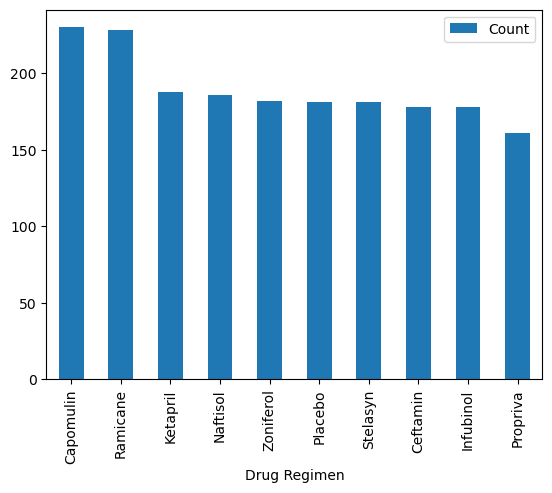

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter the DataFrame down only to 2 columes


drug_regi_mouseid_df = pd.DataFrame({
                                    "Count": group_by_summary["Mouse ID"].count()
})

sorted_drug_regi_mouseid_df=drug_regi_mouseid_df.sort_values(by="Count",ascending=False)

sorted_drug_regi_mouseid_df.plot(kind="bar")
                                    

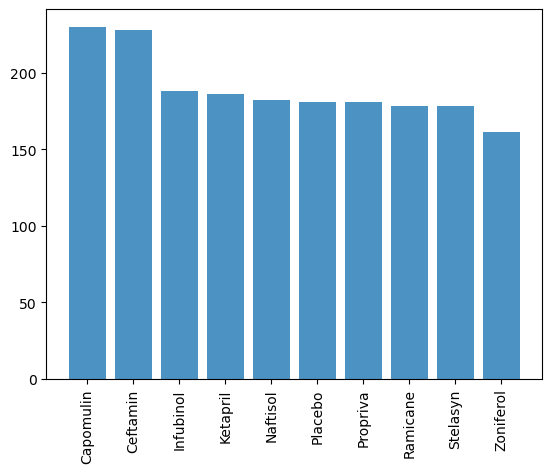

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
unique_drug_regimens = drug_reg_summary.index

x_axis = unique_drug_regimens

y_axis=group_by_summary["Mouse ID"].count().sort_values(ascending=False)



plt.bar(x_axis,y_axis,alpha=0.8,align="center")

#Set X label
plt.xticks(x_axis,rotation="vertical")

plt.show()

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Female_count=round((combined_mouse_data_df["Sex"]=="Female").sum())
Male_count=(combined_mouse_data_df["Sex"]=="Male").sum()

sex_rate_df = pd.DataFrame({
                            "Male":Male_count,
                            "Female":Female_count
},index=[0])

sex_rate_df_T=sex_rate_df.T
#sex_rate_df_T.plot(kind="pie")
#y_axis=[Male_count,Female_count]
#sex_rate_df[['Male','Female']].plot(kind="pie",sex_rate_df.columns)
#plt.show

0    2
dtype: int64

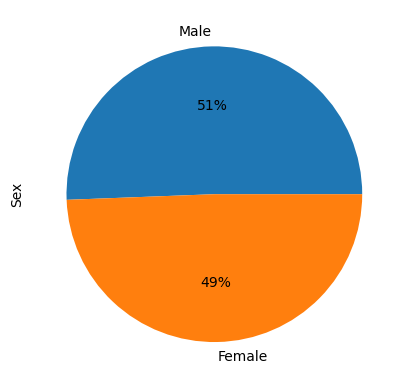

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_rate_df.loc[0], labels=sex_rate_df.columns,autopct='%1.0f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

group_by_mouse_id=combined_mouse_data_df.groupby("Mouse ID")
Mouse_timepoint_summary_df=pd.DataFrame({
                                "Max Timepoint": group_by_mouse_id["Timepoint"].max()
                            })

Mouse_timepoint_summary_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_mouse_timepoint_df=pd.merge(Mouse_timepoint_summary_df,combined_mouse_data_df,
                                how='inner', on='Mouse ID')
combined_mouse_timepoint_df

,Mouse ID,Max Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
1888,z969,45,25,63.145652,2,Naftisol,Male,9,30
1889,z969,45,30,65.841013,3,Naftisol,Male,9,30
1890,z969,45,35,69.176246,4,Naftisol,Male,9,30
1891,z969,45,40,70.314904,4,Naftisol,Male,9,30


In [85]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


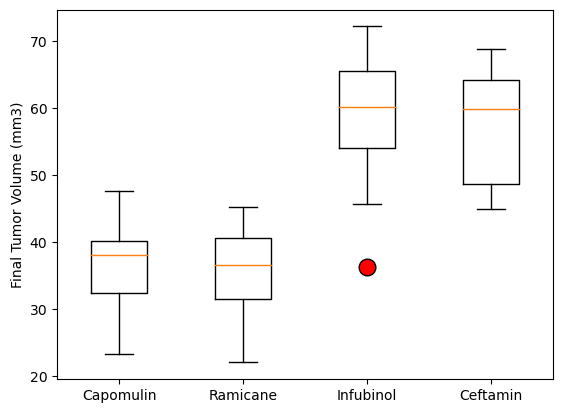

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

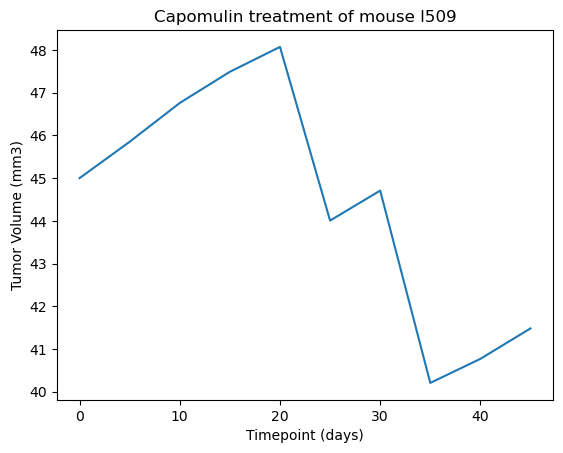

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


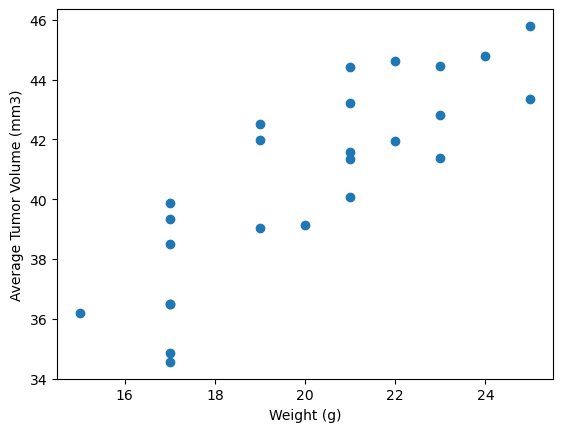

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


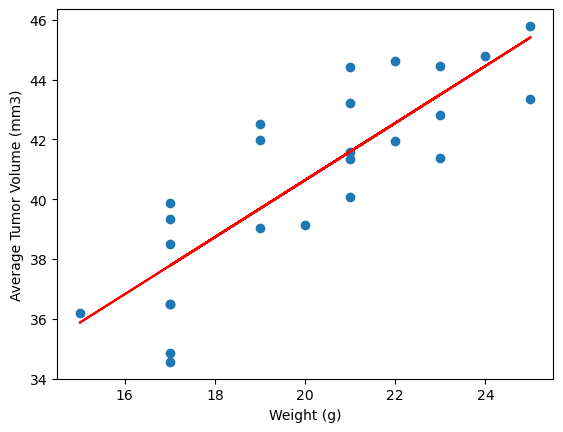

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
